# Demonstration of catastrophic interference 

Demonstrainion of catastrophic interference during consequtive training. The training is performed on three sets of equivalent data obtained by the permutation of pixels. Datasets tested are MNIST and Fashion-MNIST.

In [1]:
from keras.datasets import mnist, fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras import utils, regularizers
from keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

from progressbar import ProgressBar

Using TensorFlow backend.


In [2]:
# Neural network parameters
num_epoch = 20 # number of training epochs
num_neur = 400 # number of neurons in hidden layers
num_class = 10 # number of classes
img_line = 784 # number of input features (number of pixels in images)
bsize = 32 # batch size

In [3]:
# Load training datasets
dataset = 1 # '0' or '1' for MNIST or Fashion-MNIST
if dataset == 0:
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
else:
    (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# normalize data
X_train = X_train.reshape(60000, img_line)
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.reshape(10000, img_line)
X_test = X_test.astype('float32')
X_test /= 255

Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

# Construct neural network
model = Sequential()
l2 = 1e-4 # L2 regularization
model.add(Dense(num_neur, input_dim=img_line, activation="relu",kernel_regularizer=regularizers.l2(l2)))
model.add(Dense(num_neur, activation="relu",kernel_regularizer=regularizers.l2(l2)))
model.add(Dense(num_class, activation="softmax",kernel_regularizer=regularizers.l2(l2)))

model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.001), metrics=["accuracy"])

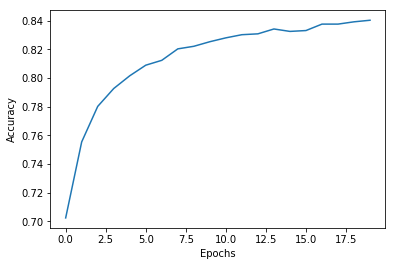

In [5]:
#construct dataset A
order_all = np.random.permutation(img_line)
tr_a = X_train[:,order_all]
ts_a = X_test[:,order_all]

# train neural network with dataset A
score_a = np.zeros((num_epoch*3,2))
history = model.fit(tr_a, Y_train, batch_size=bsize, epochs=num_epoch, validation_data=(ts_a,Y_test), verbose=0)
score_a[:num_epoch,0] = range(num_epoch)
score_a[:num_epoch,1] = history.history['val_acc']

plt.plot(score_a[:num_epoch,0],score_a[:num_epoch,1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

100% |########################################################################|


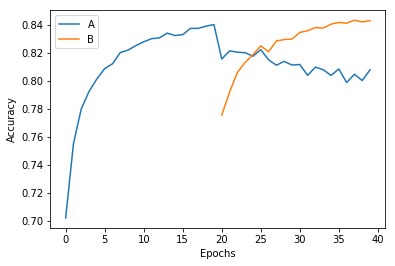

In [6]:
#construct dataset B
order_all = np.random.permutation(img_line)
tr_b = X_train[:,order_all]
ts_b = X_test[:,order_all]

# train neural network with dataset B while tesing its performance on datasets A and B
score_b = np.zeros((num_epoch*2,2))
pbar = ProgressBar(maxval=num_epoch).start()
for epoch in range(num_epoch):
    model.fit(tr_b, Y_train, batch_size=bsize, epochs=1, verbose=0)
    score = model.evaluate(ts_a, Y_test, verbose=0)
    score_a[epoch+num_epoch,:] = [epoch+num_epoch,score[1]]
    score = model.evaluate(ts_b, Y_test, verbose=0)
    score_b[epoch,:] = [epoch+num_epoch,score[1]]
    pbar.update(epoch+1)
pbar.finish()

plt.plot(score_a[:num_epoch*2,0],score_a[:num_epoch*2,1],label='A')
plt.plot(score_b[:num_epoch,0],score_b[:num_epoch,1],label='B')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

100% |########################################################################|


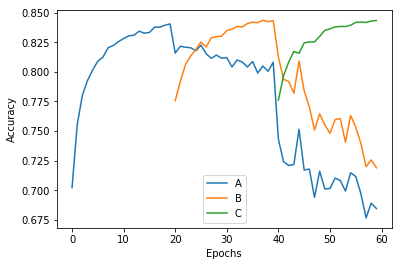

In [7]:
#construct dataset C
order_all = np.random.permutation(img_line)
tr_c = X_train[:,order_all]
ts_c = X_test[:,order_all]

# train neural network with dataset C while tesing its performance on datasets A, B, and C
score_c = np.zeros((num_epoch,2))
pbar = ProgressBar(maxval=num_epoch).start()
for epoch in range(num_epoch):
    model.fit(tr_c, Y_train, batch_size=bsize, epochs=1, verbose=0)
    score = model.evaluate(ts_a, Y_test, verbose=0)
    score_a[epoch+num_epoch*2,:] = [epoch+num_epoch*2,score[1]]
    score = model.evaluate(ts_b, Y_test, verbose=0)
    score_b[epoch+num_epoch,:] = [epoch+num_epoch*2,score[1]]
    score = model.evaluate(ts_c, Y_test, verbose=0)
    score_c[epoch,:] = [epoch+num_epoch*2,score[1]]
    pbar.update(epoch+1)
pbar.finish()

plt.plot(score_a[:,0],score_a[:,1],label='A')
plt.plot(score_b[:,0],score_b[:,1],label='B')
plt.plot(score_c[:,0],score_c[:,1],label='C')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
# save the history of training for further processing
#np.savez('Catastrophic_Interference_0',score_a=score_a,score_b=score_b,score_c=score_c)